In [ ]:
import random
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import math
import torch

from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from torchvision import datasets



## Pima dataset


In this dataset in-total we have been given 9 features out of which, given to us are 8 independent variables and “outcome” attribute is our dependent variable. Among these 8 independent variables, 7 of them has been selected for predicting the outcome. The outcome value as 0 indicates that, person is NOT diabetic AND the outcome value as 1 indicates that, person is very well diabetic. So, the “outcome” for us is a categorical (i.e. Binary) type of variable. 

In [ ]:
def get_fmnist_data():
    data_dir = './data/non-parametric/'
    train_dataset = datasets.FashionMNIST(data_dir, train=True, download=True)
    test_dataset = datasets.FashionMNIST(data_dir, train=False, download=True)

    X_train, y_train= train_dataset.train_data,train_dataset.train_labels
    X_test, y_test = test_dataset.test_data,test_dataset.test_labels
    
    return np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)

In [ ]:
# def get_pima_data():
#     col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
#     pima = pd.read_csv("data/diabetes.csv", header=None, names=col_names)
#     pima.dropna()
#     pima = pima.iloc[1:]
#     pima.head()

#     feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
#     pima_X = pima[feature_cols].astype(float) # Features
#     pima_y = pima.label.astype(float)
#     pima_X.rename(columns = {'pregnant':'f1', 'insulin':'f2', 'bmi':'f3', 'age': 'f4',
#                             'glucose': 'f5', 'bp': 'f6', 'pedigree': 'f7'}, inplace = True)
#     pima_X = pima_X.head(550)
#     pima_y = pima_y.head(550)
#     pima_X = pima_X.apply(lambda iterator: ((iterator.max() - iterator)/(iterator.max() - iterator.min())).round(2))

#     return pima_X, pima_y

Also, let’s check the same aforesaid data in terms of percentages of users have Diabetes. Below data indicates that around 35% of users have diabetes and 65% don’t have diabetes.

In [ ]:
# pima_X, pima_y = get_pima_data()
# print(pima_y.value_counts(normalize=True)*100)

## Breast cancer dataset

The breast cancer dataset is a classic and very easy binary classification dataset. Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. There are many features but the ten real-valued features are computed for each cell nucleus are: 
a) radius (mean of distances from center to points on the perimeter) 
b) texture (standard deviation of gray-scale values) 
c) perimeter 
d) area 
e) smoothness (local variation in radius lengths) 
f) compactness (perimeter^2 / area - 1.0) 
g) concavity (severity of concave portions of the contour) 
h) concave points (number of concave portions of the contour) 
i) symmetry 
j) fractal dimension ("coastline approximation" - 1)

among these features, seven of them have been selected and the target value is Diagnosis (M = malignant, B = benign).






In [ ]:
# from sklearn.datasets import load_breast_cancer

# def get_cancer_data():
#     cancer = load_breast_cancer()
#     data = np.c_[cancer.data, cancer.target]
#     columns = np.append(cancer.feature_names, ["class"])
#     sizeMeasurements = pd.DataFrame(data, columns=columns)
#     feature_cols = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
#                     'mean smoothness','mean compactness','mean symmetry']
#     cancer_X = sizeMeasurements[feature_cols].astype(float)
#     cancer_y = sizeMeasurements['class'].astype(float)
#     cancer_X.rename(columns = {'mean radius':'f1', 'mean texture':'f2', 'mean perimeter':'f3', 'mean area': 'f4',
#                             'mean smoothness': 'f5', 'mean compactness': 'f6', 'mean symmetry': 'f7'}, inplace = True)

#     cancer_X = cancer_X.head(550)
#     cancer_y = cancer_y.head(550)
#     cancer_X = cancer_X.apply(lambda iterator: ((iterator.max() - iterator)/(iterator.max() - iterator.min())).round(2))
    
#     return cancer_X, cancer_y

Also, let’s check the same aforesaid data in terms of percentages of users in each class. Below data indicates that around 37% of users are in class 0 and 63% are in class 1.

In [ ]:
# cancer_X, cancer_y = get_cancer_data()
# print(cancer_y.value_counts(normalize=True)*100)

In [ ]:

class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16*4*4, 120)  ##本来是16*5*5，mnist改为16*4*4
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 4)
        self.sm = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = torch.Tensor(x).view(-1, 1, 28, 28).type(torch.float32)
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)
        # return self.sm(x)
    
    def predict(self, x):
        output = self.forward(x)
        output = output.data.max(1, keepdim=True)[1]
        return output.reshape(-1)


## Create the graph data

Here we have a test dataset that is a comobination of the text datasets from both pima and cancer datasets mentioned above. Additionally, the features for each node of a graph is a random combination of these two datasets. For each node $i$, we first select a random number $r \in [15, 85]$ and then we randomly select $r$% of the pima dataset and $(100-r)$% of the cancer dataset as the train dataset for the node $i$.

Finally, the similarity score between nodes $i$ and $j$ is calculated based on the number of similar datapoint that they have in their training sets.

In [ ]:
def get_graph():
    # load Pima dataset
    X_train, y_train, X_test, y_test = get_fmnist_data()
    X_train = X_train / 255.0
    X_test = X_test / 255.0
    
    X_train = X_train.reshape(X_train.shape[0], 28*28)
    X_test = X_test.reshape(X_test.shape[0], 28*28)
    
    
    pima_train = np.where(y_train < 2)[0]
    pima_X_train = X_train[pima_train]
    pima_y_train = y_train[pima_train]
    
    cancer_train = np.where((y_train >= 2) & (y_train < 4))[0]
    cancer_X_train = X_train[cancer_train]
    cancer_y_train = y_train[cancer_train]
    
    # combine the pima and cancer test datasets
    pima_test = np.where(y_test < 2)[0]
    pima_X_test = X_test[pima_test]
    pima_y_test = y_test[pima_test]

    
    cancer_test = np.where((y_test >= 2) & (y_test < 4))[0]
    cancer_X_test = X_test[pima_test]
    cancer_y_test = y_test[pima_test]
    
    X_test = np.concatenate((pima_X_test, cancer_X_test))
    y_test = np.concatenate((pima_y_test, cancer_y_test))
    
    # 
    data_len = len(pima_X_train)
    datapoints = {}
    N = 20
    node_indices = []
    for n in range(N):
        # select a random number  0.25 < r < 0.75
        r = random.random()
        while r < 0.15 or r > 0.85:
            r = random.random()
            
        # uniformly select r% of the data from pima dataset
        node_idx1 = random.sample([i for i in range(data_len)], int(data_len*r)) 
        node_pima_x = pima_X_train[node_idx1]
        node_pima_y = pima_y_train[node_idx1]
        
        # uniformly select (1-r)% of the data from cancer dataset
        node_idx2 = random.sample([i for i in range(data_len)], int(data_len*(1-r))) 
        node_cancer_x = cancer_X_train[node_idx2]
        node_cancer_y = cancer_y_train[node_idx2]
        
        node_x = np.concatenate((node_pima_x, node_cancer_x))
        node_y = np.concatenate((node_pima_y, node_cancer_y))
        node_idx = random.sample([i for i in range(len(node_x))], int(len(node_x)*0.4))
        node_x = node_x[node_idx]
        node_y = node_y[node_idx]
        
        # model = LogisticRegression(multi_class='multinomial')
        if n < N//2:
            model = DecisionTreeClassifier()
            model_type = 'DT'
            optimizer = None
            loss = None
        else:
            model = LeNet()
            model_type = 'NN'
            # optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
            optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
            loss = nn.NLLLoss()
        
        node_indices.append((node_idx1, node_idx2))
        datapoints[n] = {
            'features': node_x,
            'all_features': node_x,
            'labels': node_y,
            'all_labels': node_y,
            'sample_weights': np.ones(len(node_idx)),
            'model': model,
            'optimizer': optimizer,
            'model_type': model_type,
            'loss': loss,
        }

        
    # calculate the similarities between nodes
    E = N * (N-1)//2
    B = np.zeros((E, N))
    weight_vec = np.zeros(E)
    cnt = 0
    for i in range(N):
        for j in range(N):
            if j <= i:
                continue
            data_len = len(node_indices[i][0]) + len(node_indices[i][1])
#             w1 = len(node_indices[i][0]) - len(set(node_indices[i][0]) - set(node_indices[j][0]))
#             w2 = len(node_indices[i][1]) - len(set(node_indices[i][1]) - set(node_indices[j][1]))
            
            w1 = min(len(node_indices[i][0]), len(node_indices[j][0]))
            w2 = min(len(node_indices[i][1]), len(node_indices[j][1]))
            weight_vec[cnt] = (w1 + w2)/data_len
            B[cnt, i] = 1
            B[cnt, j] = -1
            cnt += 1
            
    return B, weight_vec, datapoints, X_test, y_test

            


## Algorithm


In [ ]:
def algorithm(B, weight_vec, datapoints, X_test, y_test, lambda_lasso=1.0, K=100):
    test_len = len(X_test)
    train_batch_size = 500
    
    iter_scores = []
    for k in range(K):
        print(k)
        
        # fit the model for each node
        for node in datapoints:
            if datapoints[node]['model_type'] == 'DT':
                clf = datapoints[node]['model']
                clf = clf.fit(datapoints[node]['all_features'], datapoints[node]['all_labels'], 
                              sample_weight=datapoints[node]['sample_weights'])
                datapoints[node]['model'] = clf
            elif datapoints[node]['model_type'] == 'NN':
                network = datapoints[node]['model']
                optimizer = datapoints[node]['optimizer']
                # loss_func = datapoints[node]['loss']
                # network.train()
                n_data = len(datapoints[node]['all_features'])
                for batch_idx in range(n_data//train_batch_size):
                    optimizer.zero_grad()

                    splited_data = np.array(datapoints[node]['all_features'][batch_idx*train_batch_size:(batch_idx+1)*train_batch_size])
                    splited_target = np.array(datapoints[node]['all_labels'][batch_idx*train_batch_size:(batch_idx+1)*train_batch_size])
                    splited_target = torch.Tensor(splited_target).type(torch.LongTensor)
                    
                    output = network(splited_data)
                    # loss = loss_func(output, splited_target)
                    loss = nn.NLLLoss()(output, splited_target)
                    # if node == 19:
                    #     y_pred = network.predict(X_test)
                    #     print(len(datapoints[node]['all_features']), batch_idx, loss, metrics.accuracy_score(y_test, y_pred))
                    loss.backward()
                    optimizer.step()
                # datapoints[node]['optimizer'] = optimizer
                # datapoints[node]['model'] = network
                # datapoints[node]['loss'] = loss_func

        # calculate the accuracy for each node
        accs = []
        for node in datapoints:
            clf = datapoints[node]['model']
            y_pred = clf.predict(X_test)
            accs.append(metrics.accuracy_score(y_test, y_pred))
            # y_pred = clf.predict(datapoints[node]['features'])
            # accs.append(metrics.accuracy_score(datapoints[node]['labels'], y_pred))
        iter_scores.append(accs)

        # combine the test predictions for the adjancents node of each node
        for node in datapoints:
            datapoints[node]['all_features'] = [datapoints[node]['features']]
            datapoints[node]['all_labels'] = datapoints[node]['labels']
            datapoints[node]['sample_weights'] = np.ones(len(datapoints[node]['labels']))
            for B_neigh in np.where(B[:, node] != 0)[0]:
                w = weight_vec[B_neigh]
                for neigh in np.where(B[B_neigh, :] != 0)[0]:
                    if neigh == node:
                        continue
                    # data_idx = random.sample([i for i in range(test_len)], int(test_len*w)) 
                    data_idx = random.sample([i for i in range(test_len)], int(test_len*w*0.3)) 
                    selected_x_test = X_test[data_idx]
                    datapoints[node]['all_features'].append(selected_x_test)
                    y_pred = datapoints[neigh]['model'].predict(selected_x_test)
                    datapoints[node]['all_labels'] = np.concatenate(
                        (datapoints[node]['all_labels'], y_pred))
                    _sample_weights = [lambda_lasso/2.0 for _ in range(len(y_pred))]
                    datapoints[node]['sample_weights'] = np.concatenate(
                        (datapoints[node]['sample_weights'], _sample_weights))

            datapoints[node]['all_features'] = np.concatenate(datapoints[node]['all_features'])
            shuffled = [i for i in range(len(datapoints[node]['all_features']))]
            random.shuffle(shuffled)
            datapoints[node]['all_features'] = datapoints[node]['all_features'][shuffled]
            datapoints[node]['all_labels'] = datapoints[node]['all_labels'][shuffled]
            datapoints[node]['sample_weights'] = datapoints[node]['sample_weights'][shuffled]


    iter_scores = np.array(iter_scores)
    
    return iter_scores

In [ ]:
B, weight_vec, datapoints, X_test, y_test = get_graph()

K = 100
# K=5
# # federated learning accuracies
iter_scores = algorithm(B, weight_vec, datapoints, X_test, y_test, lambda_lasso=2.0, K=K)
print('pass alg1')

N = len(datapoints)
train_batch_size = 500
# Individual accuracies
for node in datapoints:
    model = LeNet()
    model_type = 'NN'
    optimizer = optim.SGD(model.parameters(), lr=0.1)
    if node < N//2:
        model = DecisionTreeClassifier()
        model_type = 'DT'
        optimizer = None
    datapoints[node]['model'] = model
    datapoints[node]['model_type'] = model_type
    datapoints[node]['optimizer'] = optimizer

single_iter_scores = []
for k in range(K):
    print(k)
    for node in datapoints:
        if datapoints[node]['model_type'] == 'DT':
                clf = datapoints[node]['model']
                clf = clf.fit(datapoints[node]['features'], datapoints[node]['labels'])
                datapoints[node]['model'] = clf
        elif datapoints[node]['model_type'] == 'NN':
          network = datapoints[node]['model']
          optimizer = datapoints[node]['optimizer']
          # loss_func = datapoints[node]['loss']
          # network.train()
          n_data = len(datapoints[node]['features'])
          for batch_idx in range(n_data//train_batch_size):
              optimizer.zero_grad()

              splited_data = np.array(datapoints[node]['features'][batch_idx*train_batch_size:(batch_idx+1)*train_batch_size])
              splited_target = np.array(datapoints[node]['labels'][batch_idx*train_batch_size:(batch_idx+1)*train_batch_size])
              splited_target = torch.Tensor(splited_target).type(torch.LongTensor)
              
              output = network(splited_data)
              # loss = loss_func(output, splited_target)
              loss = nn.NLLLoss()(output, splited_target)
              loss.backward()
              optimizer.step()
            
    accs = []
    for node in datapoints:
        clf = datapoints[node]['model']
        y_pred1 = clf.predict(X_test)
        accs.append(metrics.accuracy_score(y_test, y_pred1))
        # y_pred = clf.predict(datapoints[node]['features'])
        # accs.append(metrics.accuracy_score(datapoints[node]['labels'], y_pred))
    single_iter_scores.append(accs)
    
    
single_iter_scores = np.array(single_iter_scores)


  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/non-parametric/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/non-parametric/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/non-parametric/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/non-parametric/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/non-parametric/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/non-parametric/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/non-parametric/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/non-parametric/FashionMNIST/raw



/usr/local/lib/python3.8/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.8/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.8/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.8/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
pass alg1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


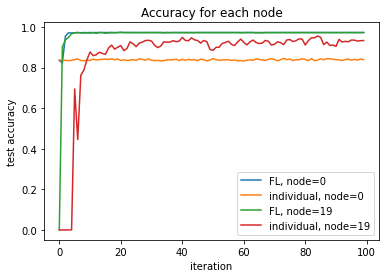

In [ ]:
f = plt.figure()
x = [i for i in range(K)]
# x = [i for i in range(15)]
for node in [0, 19]:
    plt.plot(x, iter_scores[:, node][:len(x)], label='FL, node=' + str(node))
    plt.plot(x, single_iter_scores[:, node][:len(x)], label='individual, node=' + str(node))
plt.title('Accuracy for each node')
plt.xlabel('iteration')
plt.ylabel('test accuracy')
# plt.yscale("log")
plt.legend()
plt.show()
plt.close()

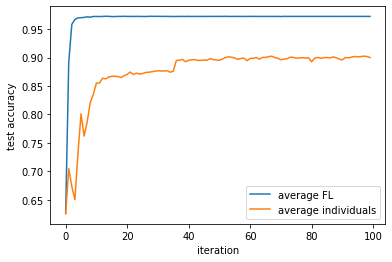

In [ ]:
f = plt.figure()
x = [i for i in range(K)]
# x = [i for i in range(15)]
fl_mean_acc = np.mean(iter_scores, axis=1)[:len(x)]
single_mean_acc = np.mean(single_iter_scores, axis=1)[:len(x)]
plt.plot(x, fl_mean_acc, label='average FL')
plt.plot(x, single_mean_acc, label='average individuals')

# plt.title('Mean accuracy for all the nodes')
plt.xlabel('iteration')
plt.ylabel('test accuracy')
# plt.yscale("log")
plt.legend()
plt.show()
f.savefig("./data/non-parametric/fmnist_fl_vs_individual_different.pdf", bbox_inches='tight')
plt.close()

In [ ]:
B, weight_vec, datapoints, X_test, y_test = get_graph()

K = 15
# federated learning accuracies
iter_scores = algorithm(B, weight_vec, datapoints, X_test, y_test, lambda_lasso=0.0, K=K)
print('pass alg1')

# Individual accuracies
for node in datapoints:
    datapoints[node]['model'] = DecisionTreeClassifier()

single_iter_scores = []
for k in range(K):
    for node in datapoints:
        clf = datapoints[node]['model']
        clf = clf.fit(datapoints[node]['features'], datapoints[node]['labels'])
        datapoints[node]['model'] = clf
        
    accs = []
    for node in datapoints:
        clf = datapoints[node]['model']
        y_pred1 = clf.predict(X_test)
        accs.append(metrics.accuracy_score(y_test, y_pred1))
    single_iter_scores.append(accs)
    
    
single_iter_scores = np.array(single_iter_scores)


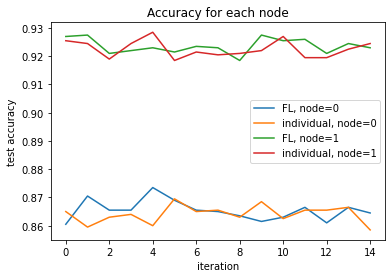

In [ ]:
f = plt.figure()
x = [i for i in range(K)]
x = [i for i in range(15)]
for node in datapoints:
    plt.plot(x, iter_scores[:, node][:len(x)], label='FL, node=' + str(node))
    plt.plot(x, single_iter_scores[:, node][:len(x)], label='individual, node=' + str(node))
    if node > 0:
        break
plt.title('Accuracy for each node')
plt.xlabel('iteration')
plt.ylabel('test accuracy')
# plt.yscale("log")
plt.legend()
plt.show()
plt.close()

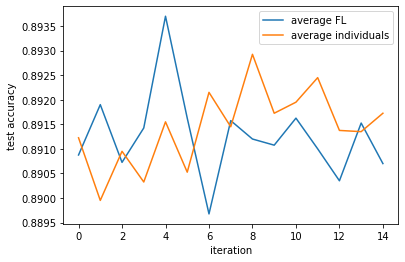

In [ ]:
f = plt.figure()
x = [i for i in range(K)]
x = [i for i in range(15)]
fl_mean_acc = np.mean(iter_scores, axis=1)[:len(x)]
single_mean_acc = np.mean(single_iter_scores, axis=1)[:len(x)]
plt.plot(x, fl_mean_acc, label='average FL')
plt.plot(x, single_mean_acc, label='average individuals')

# plt.title('Mean accuracy for all the nodes')
plt.xlabel('iteration')
plt.ylabel('test accuracy')
# plt.yscale("log")
plt.legend()
plt.show()
# f.savefig("./data/non-parametric/fl_vs_individual.pdf", bbox_inches='tight')
plt.close()

In [ ]:
import json

fl_vs_individual_data = {
    'fl_mean_acc': list(fl_mean_acc),
    'individual_mean_acc': list(single_mean_acc),
}

import pandas as pd
  
data = [[i, fl_mean_acc[i], single_mean_acc[i]] for i in range(15)]
  
# Create the pandas DataFrame
df = pd.DataFrame(data, columns=['iter', 'fl_mean', 'individual_mean'])

with open('./data/non-parametric/fmnist_fl_vs_individual.json', 'w') as f:
    f.write(json.dumps(fl_vs_individual_data))
    
df.to_csv('./data/non-parametric/fmnist_fl_vs_individual.csv')